<a href="https://colab.research.google.com/github/shriarul5273/CNN-Keras-Practice/blob/main/DeepCNN/DeepCNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Key Details 
```
      DataSet: CIFAR10 from inbuilt in Keras
      Deep learning Framework: Tensorflow with Keras
      Deep learning Method: custom CNN with Fully Connected 
      Optimizer:ADAM with 0.0004
      Results: 86 to 88% Accurate
      Total Parameters : 309,290 parameter
      Total Convolution Layer : 6

```
#### Done by shriarul643@gmail.com

- Step 0 -> Aim: **The Main objective is to get very good classification accuracy on the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).**</br>
- Step 1 -> Gather Your Dataset : I have used the cifar10 data.since it is readly available with Kears libiary,I need not do any preprocessing on  the dataset other Normalization.
- Step 2 -> Train the Netwotk : I have used a total of 6 Convolution Layer with kernel regularizer and did batch normalization after each Convolution Layer with Maxpooling and Dropouts after every 2 Convolution Layer to avoid Overfitting.
- Step 3 -> Evaluation on the training : I had a some baseline accuracy with previous experinments on the same dataset, the network had the issue of overfitting(the ntework learns too much,**i.e.** it failed to genderalize the dataset). The Table below is from those experinments:

| Architecture    | Accuracy in % |
| ----------- | ----------- |
| [Fully Connected only](https://github.com/shriarul5273/CNN-Keras-Practice/blob/main/Basics/FC_cifar10.ipynb)      |     50    |
| [Shallow CNN](https://github.com/shriarul5273/CNN-Keras-Practice/blob/main/Basics/Shallow_CNN_cifar10.ipynb) | 58        |
|[Deep CNN (same architecture)](https://github.com/shriarul5273/CNN-Keras-Practice/blob/main/Basics/CNN_cifar10.ipynb) | 85|</br>
* Deep CNN has Deep same architecture </br>as this notebook



In [1]:
# import all the necessary modules 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.</br> There are 50000 training images and 10000 test images.


In [2]:
(trainData,trainLabel),(testData,testLabel) = cifar10.load_data()
TestData = testData;

In [3]:
print(trainData.shape)
print(testData.shape)
print(trainLabel.shape)
print(testLabel.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


PreProcessing the data.</br> Transform Label into Binaries of the format [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] </br>



In [4]:
le = LabelBinarizer()
trainLabel = le.fit_transform(trainLabel)
testLabel = le.fit_transform(testLabel)
print(trainLabel.shape)
print(testLabel.shape)

(50000, 10)
(10000, 10)


In [5]:
# Normalize the data to scale of 0 to 1.
trainData = trainData.astype('float32')/255
testData = testData.astype('float32')/255


In [6]:
# Standardize the data
mean = np.mean(trainData)
std = np.std(trainData)
trainData = (trainData-mean)/(std+1e-7)

In [7]:
# Standardize the data
mean = np.mean(testData)
std = np.std(testData)
testData = (testData-mean)/(std+1e-7)

In [8]:
# the classes in the dataset with the actual Labels
TargetLabels = [
'airplane',										
'automobile',										
'bird',										
'cat',							
'deer',									
'dog',								
'frog',								
'horse',										
'ship',										
'truck']

Construct a CNN model with :</br> 
INPUT => [[CONV => RELU =>BTCN]*2=>MAXPOOL=>DOUT] *3 => FC as the architecture of the CNN



In [9]:
model = Sequential([Conv2D(32,(3,3),padding='same',activation='relu',kernel_regularizer=l2(1e-4),input_shape=(32,32,3)),
                    BatchNormalization(),
                    Conv2D(32,(3,3),padding='same',activation='relu',kernel_regularizer=l2(1e-4)),
                    BatchNormalization(),
                    MaxPool2D(),
                    Dropout(0.2),
                    Conv2D(64,(3,3),padding='same',activation='relu',kernel_regularizer=l2(1e-4)),
                    BatchNormalization(),
                    Conv2D(64,(3,3),padding='same',activation='relu',kernel_regularizer=l2(1e-4)),
                    BatchNormalization(),
                    MaxPool2D(),
                    Dropout(0.3),
                    Conv2D(128,(3,3),padding='same',activation='relu',kernel_regularizer=l2(1e-4)),
                    BatchNormalization(),
                    Conv2D(128,(3,3),padding='same',activation='relu',kernel_regularizer=l2(1e-4)),
                    BatchNormalization(),
                    MaxPool2D(),
                    Dropout(0.4),
                    Flatten(),
                    Dense(10,activation='softmax')
                    ])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [11]:
opt = Adam(0.0004)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

The main methods other than batchNormalizaion to avoid Overfitting are:</br>
-To train on more data (we can create pseudo dataset with [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) from Keras.</br>
-To train with a Reduction on learning rate on plateau with [ReduceLROnPlateau](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau) from Keras.</br>

In [12]:
earlystopping = EarlyStopping(monitor='val_loss',patience=30)
reduceLR = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=7)
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )

# compute the data augmentation on the training set
datagen.fit(trainData)

In [13]:
# training the Network for 150 epochs
H = model.fit(datagen.flow(trainData,trainLabel,batch_size=64),callbacks=[earlystopping,reduceLR],epochs=150,validation_data=(testData,testLabel))

Epoch 1/150
782/782 [==============================] - 28s 33ms/step - loss: 2.5342 - accuracy: 0.3057 - val_loss: 1.5165 - val_accuracy: 0.4854
Epoch 2/150
782/782 [==============================] - 25s 32ms/step - loss: 1.5830 - accuracy: 0.4802 - val_loss: 1.1802 - val_accuracy: 0.5977
Epoch 3/150
782/782 [==============================] - 25s 32ms/step - loss: 1.3555 - accuracy: 0.5520 - val_loss: 1.1247 - val_accuracy: 0.6294
Epoch 4/150
782/782 [==============================] - 25s 32ms/step - loss: 1.1696 - accuracy: 0.6113 - val_loss: 1.0454 - val_accuracy: 0.6659
Epoch 5/150
782/782 [==============================] - 25s 32ms/step - loss: 1.0481 - accuracy: 0.6499 - val_loss: 0.9709 - val_accuracy: 0.6926
Epoch 6/150
782/782 [==============================] - 25s 32ms/step - loss: 0.9752 - accuracy: 0.6742 - val_loss: 0.8896 - val_accuracy: 0.7144
Epoch 7/150
782/782 [==============================] - 25s 32ms/step - loss: 0.9089 - accuracy: 0.6966 - val_loss: 0.9031 - val_ac

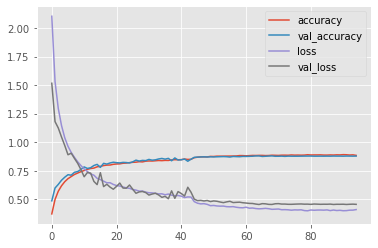

In [14]:
#plotting the results to check for overfitting.
plt.style.use('ggplot')
plt.plot(np.arange(0,np.max(H.epoch)+1),H.history['accuracy'],label='accuracy')
plt.plot(np.arange(0,np.max(H.epoch)+1),H.history['val_accuracy'],label='val_accuracy')
plt.plot(np.arange(0,np.max(H.epoch)+1),H.history['loss'],label='loss')
plt.plot(np.arange(0,np.max(H.epoch)+1),H.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

## The model is not overfitting and we have a result of about 85 to 90%

---



In [15]:
predicted = model.predict(testData)
print(classification_report(testLabel.argmax(axis=1),predicted.argmax(axis=1),target_names=TargetLabels))

              precision    recall  f1-score   support

    airplane       0.90      0.89      0.89      1000
  automobile       0.94      0.95      0.95      1000
        bird       0.87      0.81      0.84      1000
         cat       0.84      0.69      0.76      1000
        deer       0.85      0.88      0.86      1000
         dog       0.86      0.78      0.82      1000
        frog       0.78      0.97      0.86      1000
       horse       0.91      0.92      0.92      1000
        ship       0.94      0.94      0.94      1000
       truck       0.90      0.95      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



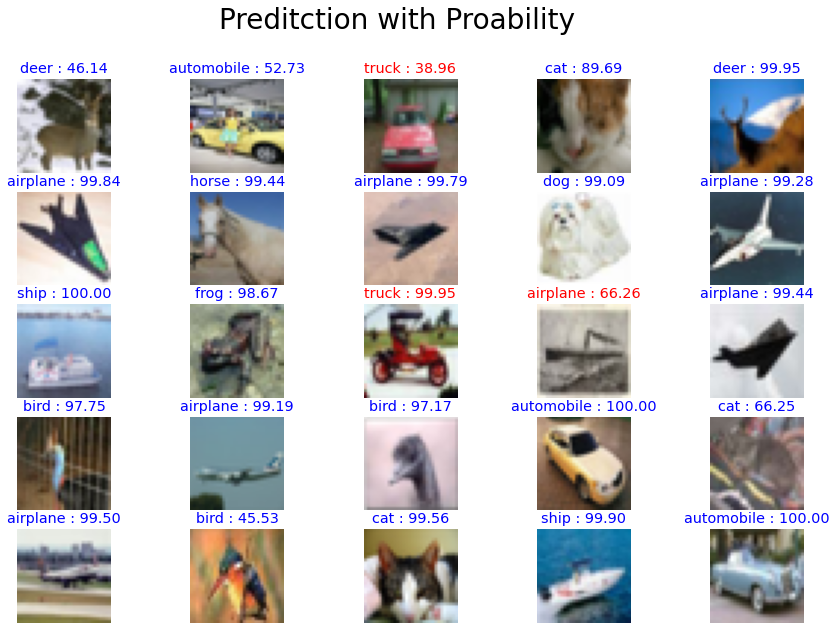

In [16]:
# Displaying the images with prediction proabilities visually.
fig  = plt.figure(figsize=(15,10))
RandomIndex = np.random.randint(0,testData.shape[0],size=(25,))
for i,j in enumerate(RandomIndex):
  plt.subplot(5,5,i+1)
  plt.imshow(TestData[j],cmap=plt.cm.binary)
  plt.axis('off')
  predictedLabel = predicted[j].argmax()
  actualLabel = testLabel[j].argmax()
  if actualLabel == predictedLabel :
    color = 'blue'
  else:
    color = 'red'
  plt.title('{} : {:.2f}'.format(TargetLabels[predictedLabel],predicted[j].max()*100),color=color)

plt.suptitle('Preditction with Proability',fontsize=28)
plt.show()